In [124]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

data = yf.download("GOOGL AAPL FB TSLA NFLX PYPL UBER AMZN INTC NVDA ADBE CSCO V IBM QCOM MSFT XLNX HPQ VZ T", start="2011-05-17", end="2021-05-17")
tech = data[["Adj Close","Volume"]]
data = yf.download("BAC JPM GS C MS HSBC BNPQY BCS LYG UBS CS WFC RY SCHW TD HDB USB PNC TFC BNS", start="2011-05-17", end="2021-05-17")
fin = data[["Adj Close","Volume"]]

[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed


In [191]:
prices_df = fin["Adj Close"]
train_prices_df, test_prices_df = train_test_split(prices_df, test_size=0.2, random_state=42, shuffle=False)

In [192]:
# k-means on training data

In [193]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = train_prices_df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
#print(returns)
returns.columns = ['Returns']
returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)
#print(returns['Volatility'])
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
cleaned_data = np.where(np.isnan(data), 0, data)
#cleaned_data

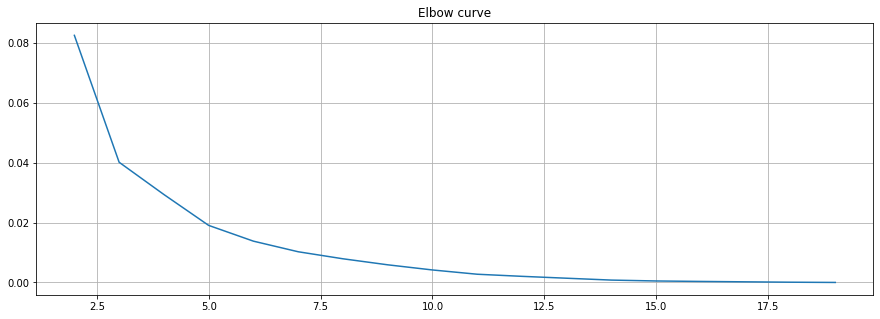

In [194]:
from sklearn.cluster import KMeans
X = cleaned_data
#within cluster sum of squares.we calculate the sum of squares of the distance of each data point 
# in cluster k from their center point ki.
wcss = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()


In [195]:
#the change in slope of curve is not significant after k=5. Hence we select no. of clusters to be 3

# computing K-Means with K = 3 (3 clusters)
K=3
train_centroids,_ = kmeans(cleaned_data,K)
# assign each sample to a cluster
idx,_ = vq(cleaned_data,train_centroids)
 
data = cleaned_data

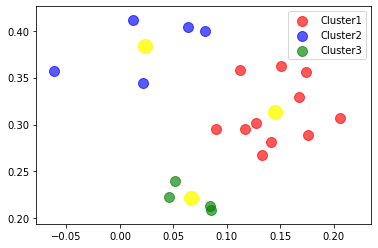

In [196]:
#using scatter plt 
plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
# plt.scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
# plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.65)
# plt.scatter(X[idx==5,0],X[idx==5,1],s=100,c='grey',label='Cluster6',alpha=0.65)
#plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='yellow')
plt.scatter(train_centroids[:,0],train_centroids[:,1],s=200, c='yellow', alpha = 0.8)
plt.legend()
plt.show()

In [197]:
train_centroids

array([[0.14478465, 0.31289077],
       [0.02300625, 0.38320169],
       [0.06687558, 0.2212576 ]])

In [198]:
import math
train_cluster_diameter = []
for i in range(K):
    max_rad = 0.0
    for point in X[idx==i]:
        dist = np.linalg.norm(point-train_centroids[i,:])
        if dist>max_rad:
            max_rad = dist
    train_cluster_diameter.append(2*max_rad)
train_cluster_diameter

[0.12250726669389325, 0.1771363102878652, 0.047787024878672056]

In [199]:
#Finally to get the details of which stock is actually in which cluster we can run the following line 
# of code to carry out a list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

In [200]:
labels =['Stock Symbol', 'Cluster']
df = pd.DataFrame.from_records(details, columns=labels)
df

,Stock Symbol,Cluster
0,BAC,0
1,BCS,1
2,BNPQY,1
3,BNS,2
4,C,0
5,CS,1
6,GS,0
7,HDB,0
8,HSBC,2
9,JPM,0


In [201]:
# k-means on testing data

In [202]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = test_prices_df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
#print(returns)
returns.columns = ['Returns']
returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)
#print(returns['Volatility'])
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
cleaned_data = np.where(np.isnan(data), 0, data)
#cleaned_data

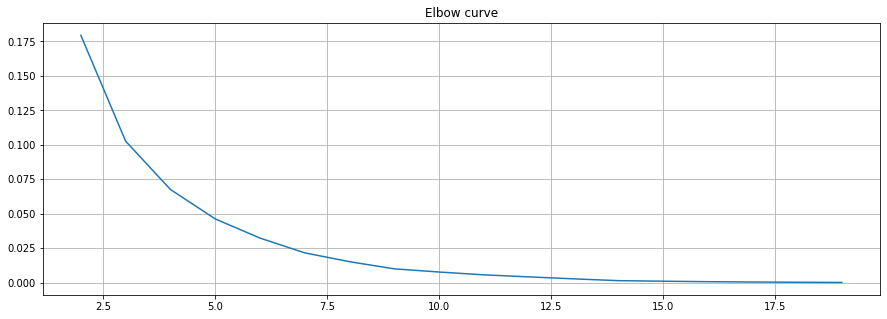

In [203]:
from sklearn.cluster import KMeans
X = cleaned_data
#within cluster sum of squares.we calculate the sum of squares of the distance of each data point 
# in cluster k from their center point ki.
wcss = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()


In [204]:
#the change in slope of curve is not significant after k=5. Hence we select no. of clusters to be 3

# computing K-Means with K = 3 (3 clusters)
test_centroids,_ = kmeans(cleaned_data,3)
# assign each sample to a cluster
idx,_ = vq(cleaned_data,test_centroids)
 
data = cleaned_data

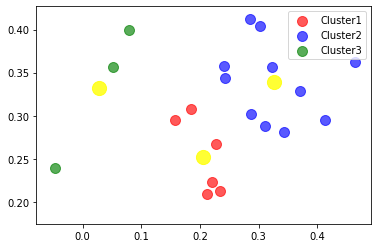

In [205]:
#using scatter plt 
plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
# plt.scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
# plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.65)
# plt.scatter(X[idx==5,0],X[idx==5,1],s=100,c='grey',label='Cluster6',alpha=0.65)
#plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='yellow')
plt.scatter(test_centroids[:,0],test_centroids[:,1],s=200, c='yellow', alpha = 0.8)
plt.legend()
plt.show()

In [206]:
test_centroids

array([[0.20597669, 0.25248981],
       [0.32587497, 0.33925001],
       [0.02796982, 0.33204947]])

In [207]:
import math
test_cluster_diameter = []
for i in range(K):
    max_rad = 0.0
    for point in X[idx==i]:
        dist = np.linalg.norm(point-test_centroids[i,:])
        if dist>max_rad:
            max_rad = dist
    test_cluster_diameter.append(2*max_rad)
test_cluster_diameter

[0.1276252670407103, 0.2811697134672212, 0.2386884575842409]

In [208]:
#Finally to get the details of which stock is actually in which cluster we can run the following line 
# of code to carry out a list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

In [209]:
labels =['Stock Symbol', 'Cluster']
df = pd.DataFrame.from_records(details, columns=labels)
df

,Stock Symbol,Cluster
0,BAC,1
1,BCS,1
2,BNPQY,1
3,BNS,0
4,C,1
5,CS,2
6,GS,1
7,HDB,0
8,HSBC,2
9,JPM,1


In [211]:
abs(train_centroids-test_centroids)

array([[0.06119204, 0.06040096],
       [0.30286872, 0.04395168],
       [0.03890576, 0.11079187]])

In [213]:
abs(np.array(train_cluster_diameter)-np.array(test_cluster_diameter))

array([0.005118  , 0.1040334 , 0.19090143])